Imports

In [1]:
import numpy as np
from package_.plots import plot_two_variables_with_start_point

In [2]:
f = lambda x, y: 4 * x ** 3 + y ** 2 - 6 * x * y - y + 7
START_X = 4
START_Y = 4
EPSILON = 0.00001

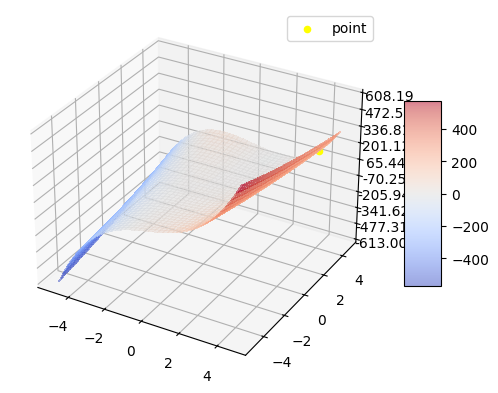

In [3]:
plot_two_variables_with_start_point(START_X, START_Y, f)

In [4]:
def newton_method(f, initial_point, epsilon):
    x, y = initial_point
    iter = 0
    h = 0.00001
    
    def gradient(f, x, y):
        df_dx = (f(x + h, y) - f(x, y)) / h
        df_dy = (f(x, y + h) - f(x, y)) / h
        return np.array([df_dx, df_dy])
        
    def hessian(f, x, y):
        df_dx = (f(x + 2 * h, y) - 2 * f(x + h, y) + f(x, y)) / (h ** 2)
        df_dy = (f(x, y + 2 * h) - 2 * f(x, y + h) + f(x, y)) / (h ** 2)
        df_dxy = (f(x + h, y + h) - f(x + h, y) - f(x, y + h) + f(x, y)) / (h ** 2)
        
        return np.array([[df_dx, df_dxy], [df_dxy, df_dy]])
        
    while True:
        iter += 1
        grad = gradient(f, x, y)
        if np.linalg.norm(grad) <= epsilon:
            break
        
        H_inv = np.linalg.inv(hessian(f, x, y))
        delta = -H_inv.dot(grad)
        
        x_next = x + delta[0]
        y_next = y + delta[1]
        
        if abs(x_next - x) <= epsilon or abs(y_next - y) <= epsilon:
            break
        
        x, y = round(x_next, 6), round(y_next, 6)
        
        if iter in [3, 5, 7, 9, 12, 15]:
            print(iter, x, y)
        # plot_two_variables_with_start_point(x, y, f)
                
    return x, y, iter

In [5]:
epsilon = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

for e in epsilon:
    print(newton_method(f, [START_X, START_Y], e))

3 1.670529 5.511675
(1.670529, 5.511675, 4)
3 1.670529 5.511675
(1.651576, 5.454718, 5)
3 1.670529 5.511675
(1.651576, 5.454718, 5)
3 1.670529 5.511675
5 1.651377 5.454127
(1.651377, 5.454127, 6)
3 1.670529 5.511675
5 1.651377 5.454127
(1.651377, 5.454127, 6)
3 1.670529 5.511675
5 1.651377 5.454127
(1.651377, 5.454127, 6)
